# Sea Sponge Challenge

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [52]:
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [53]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Dataset Sea Sponge/Train'
valid_path = '/content/drive/MyDrive/Dataset Sea Sponge/Test'

In [54]:
# Import the Resnet library as shown below and add preprocessing layer to the front of Resnet
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [55]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [56]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset Sea Sponge/Train/*')

In [57]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [58]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [59]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [60]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [61]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) #vertical_flip=True

test_datagen = ImageDataGenerator(rescale = 1./255)

In [62]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Sea Sponge/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 60 images belonging to 6 classes.


In [63]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Sea Sponge/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 6 classes.


In [64]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 8s 3s/step - loss: 4.0195 - accuracy: 0.2000 - val_loss: 9.6248 - val_accuracy: 0.2931
Epoch 2/50
2/2 [==============================] - 2s 2s/step - loss: 10.9199 - accuracy: 0.2000 - val_loss: 4.5062 - val_accuracy: 0.1724
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 8.2829 - accuracy: 0.1667 - val_loss: 10.1924 - val_accuracy: 0.1724
Epoch 4/50
2/2 [==============================] - 2s 2s/step - loss: 10.2028 - accuracy: 0.1500 - val_loss: 5.9141 - val_accuracy: 0.2069
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 5.8489 - accuracy: 0.2000 - val_loss: 4.4589 - val_accuracy: 0.2069
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 4.6248 - accuracy: 0.2500 - val_loss: 4.7775 - val_accuracy: 0.2414
Epoch 7/50
2/2 [==============================] - 2s 2s/step - loss: 4.1861 - accuracy: 0.2667 - val_loss: 5.0700 - val_accuracy: 0.2241
Epoch 8/50
2/2 [======================

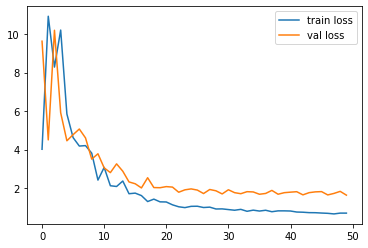

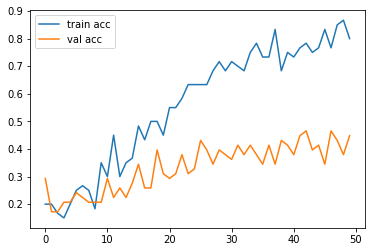

<Figure size 432x288 with 0 Axes>

In [67]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss2')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc2')

In [70]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/model_seasponge_resnet50.h5')

In [71]:
y_pred = model.predict(test_set)

In [72]:
y_pred

array([[1.75920541e-05, 6.83421016e-01, 3.16158831e-01, 8.75027308e-06,
        9.31253453e-05, 3.00737913e-04],
       [2.84141698e-03, 3.67008932e-02, 5.22632943e-03, 3.95621359e-02,
        8.83169115e-01, 3.25001590e-02],
       [1.50462613e-04, 1.59029067e-02, 9.64215159e-01, 1.25265997e-02,
        7.10310851e-05, 7.13382754e-03],
       [4.32553497e-05, 5.16281843e-01, 4.82856780e-01, 1.88684644e-05,
        1.16721865e-04, 6.82530343e-04],
       [2.87365615e-02, 2.35841349e-01, 2.59528935e-01, 1.72187850e-01,
        8.18107203e-02, 2.21894562e-01],
       [1.48314402e-01, 3.64335328e-02, 3.95400785e-02, 3.96168903e-02,
        3.13823551e-01, 4.22271580e-01],
       [1.72421423e-05, 7.81750754e-02, 8.67362082e-01, 1.98482536e-03,
        2.40471680e-03, 5.00560999e-02],
       [2.90400926e-02, 3.89560387e-02, 1.18354760e-01, 2.11586624e-01,
        4.94492710e-01, 1.07569799e-01],
       [5.09119174e-03, 9.26697999e-03, 8.66143346e-01, 9.70650837e-03,
        5.81436493e-02, 

In [73]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [74]:
y_pred

array([1, 4, 2, 1, 2, 5, 2, 4, 2, 4, 5, 1, 1, 4, 5, 4, 5, 3, 0, 1, 4, 4,
       4, 4, 2, 4, 4, 1, 4, 1, 1, 3, 5, 2, 4, 5, 1, 3, 2, 3, 0, 5, 4, 5,
       3, 4, 4, 1, 2, 1, 2, 5, 5, 1, 3, 2, 1, 2])

In [75]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [76]:
model=load_model('/content/drive/MyDrive/model_seasponge_resnet50.h5')

In [77]:
img=image.load_img('/content/drive/MyDrive/Dataset Sea Sponge/Test/sea_squirt_sponge/jpg_11.jpg',target_size=(224,224))

In [78]:
x=image.img_to_array(img)
x

array([[[67., 33., 23.],
        [68., 31., 22.],
        [67., 31., 19.],
        ...,
        [45., 32., 15.],
        [45., 32., 15.],
        [46., 33., 16.]],

       [[62., 28., 18.],
        [64., 27., 18.],
        [64., 28., 16.],
        ...,
        [45., 32., 15.],
        [45., 32., 15.],
        [46., 33., 16.]],

       [[58., 21., 12.],
        [58., 21., 12.],
        [59., 22., 13.],
        ...,
        [45., 32., 15.],
        [45., 32., 15.],
        [45., 32., 15.]],

       ...,

       [[61., 40., 19.],
        [59., 38., 17.],
        [57., 36., 15.],
        ...,
        [11.,  0.,  0.],
        [17.,  2.,  0.],
        [31., 16., 13.]],

       [[70., 55., 16.],
        [67., 47., 20.],
        [57., 35., 21.],
        ...,
        [27.,  8.,  0.],
        [29., 10.,  0.],
        [32., 13.,  0.]],

       [[70., 55., 16.],
        [67., 47., 20.],
        [58., 36., 22.],
        ...,
        [45., 26., 12.],
        [47., 28., 14.],
        [50., 31., 17.]]

In [79]:
x.shape

(224, 224, 3)

In [80]:
x=x/255

In [81]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [82]:
model.predict(img_data)

array([[9.0224687e-03, 2.6554060e-01, 5.4371906e-03, 8.6107122e-04,
        7.1900952e-01, 1.2909541e-04]], dtype=float32)

In [83]:
a=np.argmax(model.predict(img_data), axis=1)

In [84]:
a

array([4])